In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import style
import tueplots.constants.color.rgb as rgb
from tueplots import bundles

plt.rcParams.update(bundles.neurips2021(usetex=False))

In [2]:
data = pd.read_csv('../Data-literacy-project-main/source-data-updated/output_excess-death_poilical-status_hdi.csv')
df = data.drop(['Unnamed: 0'], axis=1)
df = df.replace({'F': 1, 'PF' : 2, 'NF': 3})
print(df)

FileNotFoundError: [Errno 2] No such file or directory: '../Data-literacy-project-main/source-data-updated/output_excess-death_poilical-status_hdi.csv'

In [44]:
difference = df['excess_deaths_per_100k'].values - df['covid_deaths_per_100k'].values
df["difference"] = difference

In [45]:
hdi_excess_death = df[["country","excess_deaths_per_100k","Status","HDI_2019"]]
hdi_difference = df[["country","difference","Status","HDI_2019"]]

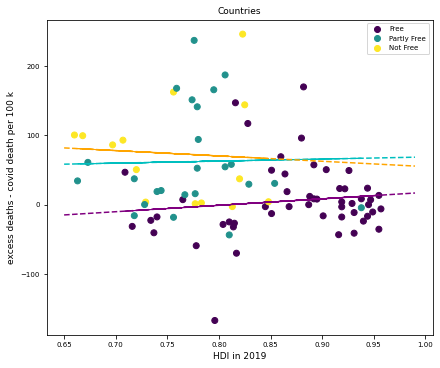

In [46]:
classes = ["Free","Partly Free","Not Free"]
colors = ["purple", "c","orange"]
fig, axes = plt.subplots(1, figsize = (6,5))
scatter = plt.scatter(x = df.HDI_2019, y = df.difference, c = df.Status)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
axes.set_ylabel("excess deaths - covid death per 100 k")
axes.set_xlabel("HDI in 2019")
axes.set_title("Countries")
for i in range(1,4):
    data = pd.DataFrame()
    data = (hdi_difference
            .groupby(["Status"])
            .get_group(i))
    fit = np.polyfit(data.HDI_2019, data.difference,1)
    x = data.HDI_2019
    yfitted = fit[0] * data.HDI_2019 + fit[1]
    x_ex = np.arange(0.65,1,0.02)
    y_ex = fit[0] * x_ex  + fit[1]
    plt.plot(x,yfitted,color=colors[i-1], linewidth=1)
    plt.plot(x_ex , y_ex, color=colors[i-1], linestyle='--')
plt.savefig('../Data-literacy-project-main/Plots/figname_allstatus.pdf',bbox_inches='tight')


In [ ]:
hdi_difference #name countries that are anomalies

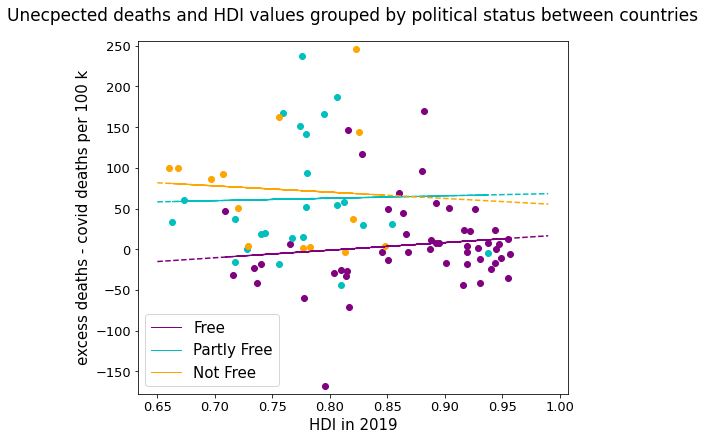

In [66]:
colors = ["purple", "c","orange"]
fig, axes = plt.subplots(1, figsize = (7,6))

for i in range(1,4):
    data = pd.DataFrame()
    data = (hdi_difference
            .groupby(["Status"])
            .get_group(i))
    scatter = axes.scatter(data.HDI_2019, data.difference,color=colors[i-1])
    fit = np.polyfit(data.HDI_2019, data.difference,1)
    x = data.HDI_2019
    yfitted = fit[0] * data.HDI_2019 + fit[1]
    x_ex = np.arange(0.65,1,0.02)
    y_ex = fit[0] * x_ex  + fit[1]
    
    axes.plot(x,yfitted,color=colors[i-1], linewidth=1,label = classes[i-1])
    axes.plot(x_ex , y_ex, color=colors[i-1], linestyle='--')
    axes.set_ylim(np.min(df.difference)-10,np.max(df.difference)+10)
    axes.set_ylabel("excess deaths - covid deaths per 100 k", size = 15)
    axes.set_xlabel("HDI in 2019", size = 15)
    
axes.legend(loc=3, prop={'size': 15})
axes.set_title("Unecpected deaths and HDI values grouped by political status between countries", size = 17, pad=20)
plt.rc('xtick', labelsize=13) #fontsize of the x tick labels
plt.rc('ytick', labelsize=13)

plt.savefig('../Data-literacy-project-main/Plots/fig1.pdf',bbox_inches='tight')


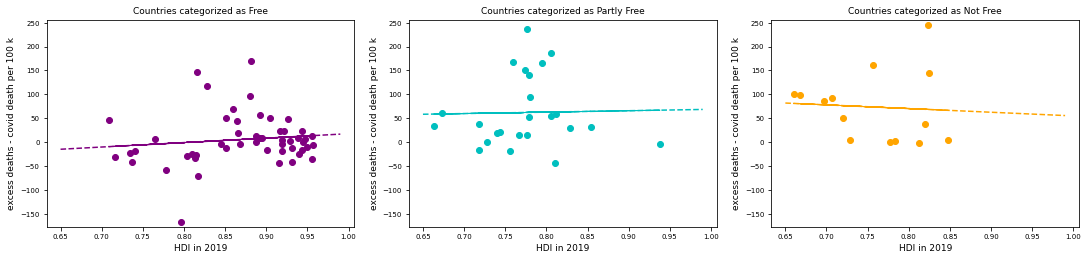

In [37]:
fig, axes = plt.subplots(1,3, figsize = (15,3.5))
for i in range(1,4):
    data = pd.DataFrame()
    data = (hdi_difference
            .groupby(["Status"])
            .get_group(i))
    axes[i-1].scatter(data.HDI_2019, data.difference,color=colors[i-1])
    fit = np.polyfit(data.HDI_2019, data.difference,1)
    x = data.HDI_2019
    yfitted = fit[0] * data.HDI_2019 + fit[1]
    x_ex = np.arange(0.65,1,0.02)
    y_ex = fit[0] * x_ex  + fit[1]
    
    axes[i-1].plot(x,yfitted,color=colors[i-1], linewidth=1)
    axes[i-1].plot(x_ex , y_ex, color=colors[i-1], linestyle='--')
    axes[i-1].set_ylim(np.min(df.difference)-10,np.max(df.difference)+10)
    axes[i-1].set_ylabel("excess deaths - covid death per 100 k")
    axes[i-1].set_xlabel("HDI in 2019")
    axes[i-1].set_title("Countries categorized as %s" %classes[i-1])
plt.savefig('../Data-literacy-project-main/Plots/figname_neurips.pdf',bbox_inches='tight')


TypeError: 'Int64Index' object is not callable